Just for fun: can we predict VP using attentiveFP?

In [1]:
import pandas as pd
df = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/mols_mdfp_physchem_features.csv')
df

,molregno,conf_id,vp_log10_pa,mdfp,molblock,ROMol,descriptors,mdfp_vec,NumHeavyAtoms,NumN,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,NumRotatableBonds
0,8,1151,-3.053298,"{'mdfp': '[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97....",[H]OC(=O)c1c([H])c([H])c2c([H])c([H])c([H])c([...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef300>,"{'MaxAbsEStateIndex': 10.644614040060468, 'Max...","[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...",13.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,9,1152,3.593202,"{'mdfp': '[5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.484...",[H]C([H])(Cl)OC([H])([H])Cl\n RDKit ...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef370>,"{'MaxAbsEStateIndex': 4.994984567901234, 'MaxE...","[5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...",5.0,0.0,...,0,0,0,0,0,0,0,0,0,2
2,11,1154,5.259101,"{'mdfp': '[4, 0, 0, 0, 1, 0, 0, 2, 0, 0, -0.10...",[H]C(F)(Cl)Cl\n RDKit 3D\n\n 0 ...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef290>,"{'MaxAbsEStateIndex': 10.530864197530864, 'Max...","[4, 0, 0, 0, 1, 0, 0, 2, 0, 0, -0.104781552046...",4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,12,1155,-3.104198,"{'mdfp': '[13, 3, 0, 3, 0, 0, 0, 1, 0, 0, -105...",[H]OC(=O)C([H])([H])Oc1c([H])c([H])c(Cl)c([H])...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef220>,"{'MaxAbsEStateIndex': 10.199797003163404, 'Max...","[13, 3, 0, 3, 0, 0, 0, 1, 0, 0, -105.003804343...",13.0,0.0,...,0,0,0,0,0,0,0,0,0,3
4,13,1156,3.664201,"{'mdfp': '[6, 2, 0, 0, 0, 0, 0, 0, 1, 0, -1.41...",[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([H]...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef1b0>,"{'MaxAbsEStateIndex': 3.349930555555556, 'MaxE...","[6, 2, 0, 0, 0, 0, 0, 0, 1, 0, -1.410024750661...",6.0,0.0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3749,17247,1.036000,"{'mdfp': '[11, 1, 0, 1, 0, 0, 0, 0, 0, 0, -22....",[H]C([H])=C(C([H])([H])[H])[C@]1([H])C([H])([H...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f7d0>,"{'MaxAbsEStateIndex': 11.199537037037036, 'Max...","[11, 1, 0, 1, 0, 0, 0, 0, 0, 0, -22.7079118557...",11.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3227,2545,17253,2.301000,"{'mdfp': '[4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5.357...",[H]/C(I)=C(\[H])I\n RDKit 3D\n\n ...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f840>,"{'MaxAbsEStateIndex': 2.1633333333333336, 'Max...","[4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5.3572325631171...",4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3228,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.0...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f8b0>,"{'MaxAbsEStateIndex': 9.177685185185185, 'MaxE...","[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.02947008199...",8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3229,2680,17260,2.216000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.1...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f920>,"{'MaxAbsEStateIndex': 9.177685185185185, 'MaxE...","[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.16582824638...",8.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from serenityff.charge.gnn.utils import get_graph_from_mol
from rdkit import Chem
import torch

allowable_set= [
    "C",
    "N",
    "O",
    "F",
    "P",
    "S",
    "Cl",
    "Br",
    "I",
    "H",
]

molblocks = df['molblock'].tolist()
all_mols = [Chem.MolFromMolBlock(molblock) for molblock in molblocks]
mols = [m for m in all_mols if m.GetNumAtoms() > 1]
error_mol = [m for m in all_mols if m.GetNumAtoms() <= 1]
data = [get_graph_from_mol(mol, index, allowable_set,no_y=True) for index, mol in enumerate(mols)]
#add y values
indices_to_drop = [all_mols.index(m) for m in error_mol]
if indices_to_drop:
    print('Caution! Mols dropped')
    df = df.drop(indices_to_drop)
y = df['vp_log10_pa'].tolist()
molregnos = df['molregno'].tolist()
y = torch.tensor(y)
y = y.unsqueeze(1)
for i in range(len(data)):
    data[i].y = y[i]
    data[i].molregno = molregnos[i]
print('saving')

saving


In [61]:
test = get_graph_from_mol(mols[0], 0, allowable_set,no_y=True)
test.y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
print(len(data))

3230


In [ ]:
#split the data random 80/20


In [14]:
from math import sqrt
from torch.nn import functional as F
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def train_combined(train_loader, model, optimizer):
    total_loss  = total_examples = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        data.y = data.y.view(-1, 1)
        loss = F.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
        total_examples += data.num_graphs

    return sqrt(total_loss / total_examples)

def val_combined(train_loader, model):
    total_loss = total_examples = 0
    for data in train_loader:
        data = data.to(device)
        data.y = data.y.view(-1, 1)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        loss = F.mse_loss(out, data.y)
        total_loss += float(loss) * data.num_graphs
        total_examples += data.num_graphs
    return sqrt(total_loss / total_examples)


def train_val_combined(model, train_loader, val_loader, optimizer, num_epochs,verbose=True):
    scheduler = ReduceLROnPlateau(optimizer, patience=2, factor=0.9,verbose=False)
    model = model.to(device)
    train_losses = []
    val_losses = []
    min_val_los = 1000
    for epoch in range(num_epochs):
        model.train()
        train_loss = train_combined(train_loader, model, optimizer)
        train_losses.append(train_loss)

        model.eval()
        val_loss = val_combined(val_loader, model)
        val_losses.append(val_loss)
        scheduler.step(val_loss)
        if val_loss < min_val_los:
            min_val_los = val_loss
            counter = 0
        else:
            counter += 1
        if counter > 10:
            if verbose:
                print('early stopping')
            break
        if verbose:
            print(f"Epoch {epoch + 1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return

In [11]:
#split data random 80/20 in train/test
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch_geometric.nn.models import AttentiveFP

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AttentiveFP(in_channels=23, hidden_channels=200, out_channels=1,
            edge_dim=11, num_layers=4, num_timesteps=2,
            dropout=0.0).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=10**-3,weight_decay=10**-4)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [15]:
train_val_combined(model, train_loader, test_loader, optimizer, 50,verbose=True)

Epoch 1/50: Train Loss: 2.0741, Val Loss: 1.5157
Epoch 2/50: Train Loss: 1.4344, Val Loss: 1.3230
Epoch 3/50: Train Loss: 1.3154, Val Loss: 1.2429
Epoch 4/50: Train Loss: 1.2256, Val Loss: 1.1410
Epoch 5/50: Train Loss: 1.1616, Val Loss: 1.0921
Epoch 6/50: Train Loss: 1.0666, Val Loss: 1.0755
Epoch 7/50: Train Loss: 1.0518, Val Loss: 1.0190
Epoch 8/50: Train Loss: 1.0049, Val Loss: 0.9699
Epoch 9/50: Train Loss: 0.9846, Val Loss: 0.9311
Epoch 10/50: Train Loss: 0.9794, Val Loss: 0.9561
Epoch 11/50: Train Loss: 0.9056, Val Loss: 0.9584
Epoch 12/50: Train Loss: 0.9020, Val Loss: 0.9060
Epoch 13/50: Train Loss: 0.8456, Val Loss: 0.8867
Epoch 14/50: Train Loss: 0.8679, Val Loss: 0.8209
Epoch 15/50: Train Loss: 0.8330, Val Loss: 0.8681
Epoch 16/50: Train Loss: 0.8012, Val Loss: 0.8237
Epoch 17/50: Train Loss: 0.7900, Val Loss: 0.8669
Epoch 18/50: Train Loss: 0.7925, Val Loss: 0.8104
Epoch 19/50: Train Loss: 0.7596, Val Loss: 0.7953
Epoch 20/50: Train Loss: 0.7378, Val Loss: 0.7976
Epoch 21/

In [27]:
def get_preds_single(val_loader, model):
    preds,ys,molregnos = [],[],[]
    for data in val_loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        preds.extend(out)
        ys.extend(data.y)
        molregnos.extend(data.molregno)
    preds = [float(p) for p in preds]
    ys = [float(y) for y in ys]    
    molregnos = [int(m) for m in molregnos]     
    
    
    return preds,ys,molregnos

In [54]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import RepeatedKFold
import pickle
# Assuming `data` is your PyG dataset

def train_grouped_kfold_gnn(data, n_splits=3, n_repeats=5, random_state=2652124,epochs=50):
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
    output = ([], [], [])

    for i, (train_index, test_index) in enumerate(rkf.split(data)):

        model = AttentiveFP(in_channels=23, hidden_channels=200, out_channels=1,
            edge_dim=11, num_layers=4, num_timesteps=2,
            dropout=0.0).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=10**-3,weight_decay=10**-4)
        
        train_data = [data[i] for i in train_index]
        test_data = [data[i] for i in test_index]

        #split train 80/20 in train/val
        train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
        train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=32, shuffle=False)


        model.to(device).reset_parameters()
        optimizer = torch.optim.Adam(model.parameters(), lr=10**-3, weight_decay=10**-4)

        train_val_combined(model, train_loader, val_loader, optimizer, num_epochs=epochs, verbose=False)
        print(f'fold {i+1} done')

        #get preds for test set
        test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
        preds,ys,molregnos = get_preds_single(test_loader, model)
        output[0].append(preds)
        output[1].append(ys)
        output[2].append(molregnos)

    return output


In [55]:
output_repeat = train_grouped_kfold_gnn(data, n_splits=3, n_repeats=5, random_state=2652124,epochs=50)

fold 1 done
fold 2 done
fold 3 done
fold 4 done
fold 5 done
fold 6 done
fold 7 done
fold 8 done
fold 9 done
fold 10 done
fold 11 done
fold 12 done
fold 13 done
fold 14 done
fold 15 done


In [36]:
output = train_grouped_kfold_gnn(data, n_splits=3, n_repeats=5, random_state=2652124,epochs=50)

Epoch 1/50: Train Loss: 2.2692, Val Loss: 1.8104
Epoch 2/50: Train Loss: 1.5758, Val Loss: 1.5167
Epoch 3/50: Train Loss: 1.4977, Val Loss: 1.5996
Epoch 4/50: Train Loss: 1.3840, Val Loss: 1.2909
Epoch 5/50: Train Loss: 1.2616, Val Loss: 1.2299
Epoch 6/50: Train Loss: 1.2071, Val Loss: 1.1556
Epoch 7/50: Train Loss: 1.1448, Val Loss: 1.3148
Epoch 8/50: Train Loss: 1.1299, Val Loss: 1.1759
Epoch 9/50: Train Loss: 1.1323, Val Loss: 1.1885
Epoch 10/50: Train Loss: 1.0770, Val Loss: 1.0402
Epoch 11/50: Train Loss: 1.0206, Val Loss: 1.0772
Epoch 12/50: Train Loss: 0.9708, Val Loss: 1.0990
Epoch 13/50: Train Loss: 0.9697, Val Loss: 1.0807
Epoch 14/50: Train Loss: 0.9739, Val Loss: 0.9787
Epoch 15/50: Train Loss: 0.9132, Val Loss: 0.9651
Epoch 16/50: Train Loss: 0.8837, Val Loss: 0.9855
Epoch 17/50: Train Loss: 0.8861, Val Loss: 0.9226
Epoch 18/50: Train Loss: 0.8691, Val Loss: 0.9391
Epoch 19/50: Train Loss: 0.8534, Val Loss: 0.9554
Epoch 20/50: Train Loss: 0.8312, Val Loss: 0.9679
Epoch 21/

In [52]:
#make df from outputs
df = pd.DataFrame(output).T
df.columns = ['preds','ys','molregno']
df
#average over molregno
df = df.groupby('molregno').mean()
df
#get: RMSE, kendall tau, fraction of errors >1, mean and median absolute error
from scipy.stats import kendalltau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(df['ys'], df['preds']))
kendall = kendalltau(df['ys'], df['preds']).correlation
mae = mean_absolute_error(df['ys'], df['preds'])
mae_median = df['ys'].sub(df['preds']).abs().median()
fraction = sum(abs(df['ys'] - df['preds']) < 1) / len(df)
#print all out descriptively, rounded by 2
print(f'RMSE: {round(rmse,2)}')
print(f'Kendall tau: {round(kendall,2)}')
print(f'MAE: {round(mae,2)}')
print(f'Median absolute error: {round(mae_median,2)}')
print(f'Fraction of errors < 1: {round(fraction,2)}')


RMSE: 0.73
Kendall tau: 0.9
MAE: 0.45
Median absolute error: 0.24
Fraction of errors < 1: 0.88


In [45]:
df = pd.DataFrame(output).T
df.columns = ['preds','ys','molregno']
print(len(df)/15)

1076.6666666666667


In [ ]:
reals = output[1]
preds = output[0]
molregnos = output[2]
#make from this lists 15 nested lists each
reals = [reals[i:i+15] for i in range(0, len(reals), 15)]


In [38]:

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    median_AE = median_absolute_error(np.array(x), np.array(y))

    return RMSE, MAE, EBO, KT, median_AE

def density_plot_single_custom_local(reals, predictions, molregnos, print_stats=True, bounds=None, title=None, print_spearman=False, name=None):
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    rmses, maes, ebos, kts,median_aes = [], [], [], [],[]
    
    for r, p in zip(reals, predictions):
        RMSE, MAE, EBO, KT,median_AE = getStatValues_v2(r, p)
        rmses.append(RMSE)
        maes.append(MAE)
        ebos.append(EBO)
        kts.append(KT)
        median_aes.append(median_AE)
    
    rmse_90_low, rmse_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(rmses), scale=stats.sem(rmses))
    rmse_mean = np.mean(rmses)
    mae_90_low, mae_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(maes), scale=stats.sem(maes))
    mae_mean = np.mean(maes)
    ebo_90_low, ebo_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(ebos), scale=stats.sem(ebos))
    ebo_mean = np.mean(ebos)
    kt_90_low, kt_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(kts), scale=stats.sem(kts))
    kt_mean = np.mean(kts)
    median_AE_90_low, median_AE_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(median_aes), scale=stats.sem(median_aes))
    median_AE_mean = np.mean(median_aes)

    
    # molregno = molregnos[0]
    
    mrn = [item for sublist in molregnos for item in sublist]
    real = [item for sublist in reals for item in sublist]
    prediction = [item for sublist in predictions for item in sublist]
    
    df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
    df = df.groupby('molregno').mean()
    real = df['real'].tolist()
    prediction = df['prediction'].tolist()
    
    ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
    ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
    ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')

    dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
    z = dens_u.pdf([real, prediction])
    
    sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)
    
    ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
    ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
    ax.grid(True, which="both")
    
    if bounds is None:
        lower = min(prediction + real) - 2
        upper = max(prediction + real) + 2
    else:
        lower = bounds[0]
        upper = bounds[1]
    
    ax.axis([lower, upper, lower, upper])
    
    text_box = ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMedian AE: {median_AE_mean:.2f} ({median_AE_90_low:.2f}-{median_AE_90_high:.2f})\nMean AE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})', 
                       transform=ax.transAxes, fontsize=12, verticalalignment='top',
                       bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    if title is not None:
        ax.set_title(title, fontsize=14)
    
    ax.set_aspect('equal', 'box')
    
    if name:
        plt.savefig(name+'.png', dpi=600)
    
    plt.show()

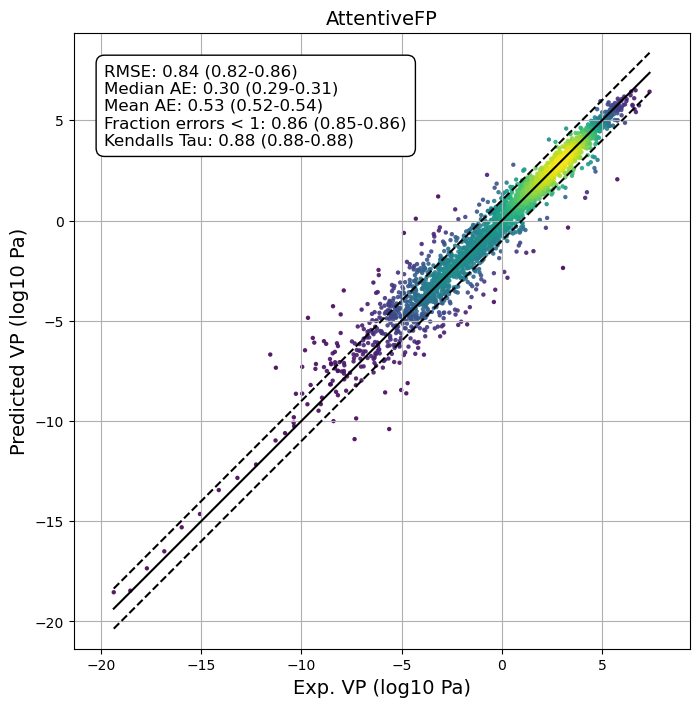

In [62]:
density_plot_single_custom_local(reals = output_repeat[1], predictions = output_repeat[0], molregnos = output_repeat[2], print_stats=True, bounds=None, title='AttentiveFP', print_spearman=False, name=None)